In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tqdm import tqdm

In [3]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [0]:
# To make sure that we can reproduce the experiment and get the same results
np.random.seed(10)

# The dimension of our random noise vector.
random_dim = 100

In [0]:
def load_minst_data():
    # load the data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # normalize our inputs to be in the range[-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    # convert x_train with a shape of (60000, 28, 28) to (60000, 784) so we have
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [0]:
# You will use the Adam optimizer
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [0]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    # We initially set trainable to False since we only want to train either the
    # generator or discriminator at a time
    discriminator.trainable = False
    # gan input (noise) will be 100-dimensional vectors
    gan_input = Input(shape=(random_dim,))
    # the output of the generator (an image)
    x = generator(gan_input)
    # get the output of the discriminator (probability if the image is real or not)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [0]:
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------


  1%|          | 4/468 [00:00<00:12, 37.54it/s]

--------------- Epoch 2 ---------------


  1%|          | 4/468 [00:00<00:12, 37.66it/s]

--------------- Epoch 3 ---------------


  1%|          | 4/468 [00:00<00:11, 39.05it/s]

--------------- Epoch 4 ---------------


  1%|          | 4/468 [00:00<00:12, 37.79it/s]

--------------- Epoch 5 ---------------


  1%|          | 4/468 [00:00<00:11, 39.51it/s]

--------------- Epoch 6 ---------------


  1%|          | 4/468 [00:00<00:12, 38.21it/s]

--------------- Epoch 7 ---------------


  1%|          | 4/468 [00:00<00:11, 38.67it/s]

--------------- Epoch 8 ---------------


  1%|          | 4/468 [00:00<00:12, 38.36it/s]

--------------- Epoch 9 ---------------


  1%|          | 4/468 [00:00<00:12, 38.09it/s]

--------------- Epoch 10 ---------------


  1%|          | 4/468 [00:00<00:12, 35.74it/s]

--------------- Epoch 11 ---------------


  1%|          | 4/468 [00:00<00:12, 37.78it/s]

--------------- Epoch 12 ---------------


  1%|          | 4/468 [00:00<00:12, 37.40it/s]

--------------- Epoch 13 ---------------


  1%|          | 4/468 [00:00<00:12, 38.25it/s]

--------------- Epoch 14 ---------------


  1%|          | 4/468 [00:00<00:11, 39.08it/s]

--------------- Epoch 15 ---------------


  1%|          | 4/468 [00:00<00:13, 33.85it/s]

--------------- Epoch 16 ---------------


  1%|          | 4/468 [00:00<00:12, 38.37it/s]

--------------- Epoch 17 ---------------


  1%|          | 4/468 [00:00<00:12, 36.43it/s]

--------------- Epoch 18 ---------------


  1%|          | 4/468 [00:00<00:13, 35.14it/s]

--------------- Epoch 19 ---------------


  1%|          | 4/468 [00:00<00:12, 38.10it/s]

--------------- Epoch 20 ---------------


  1%|          | 4/468 [00:00<00:12, 37.67it/s]

--------------- Epoch 21 ---------------


  1%|          | 4/468 [00:00<00:12, 37.96it/s]

--------------- Epoch 22 ---------------


  1%|          | 4/468 [00:00<00:11, 39.45it/s]

--------------- Epoch 23 ---------------


  1%|          | 4/468 [00:00<00:12, 38.59it/s]

--------------- Epoch 24 ---------------


  1%|          | 4/468 [00:00<00:12, 37.90it/s]

--------------- Epoch 25 ---------------


  1%|          | 4/468 [00:00<00:12, 38.49it/s]

--------------- Epoch 26 ---------------


  1%|          | 4/468 [00:00<00:12, 38.28it/s]

--------------- Epoch 27 ---------------


  1%|          | 4/468 [00:00<00:12, 38.20it/s]

--------------- Epoch 28 ---------------


  1%|          | 4/468 [00:00<00:12, 37.98it/s]

--------------- Epoch 29 ---------------


  1%|          | 4/468 [00:00<00:12, 38.34it/s]

--------------- Epoch 30 ---------------


  1%|          | 4/468 [00:00<00:12, 38.15it/s]

--------------- Epoch 31 ---------------


  1%|          | 4/468 [00:00<00:11, 38.89it/s]

--------------- Epoch 32 ---------------


  1%|          | 4/468 [00:00<00:11, 39.15it/s]

--------------- Epoch 33 ---------------


  1%|          | 4/468 [00:00<00:11, 38.98it/s]

--------------- Epoch 34 ---------------


  1%|          | 4/468 [00:00<00:12, 36.99it/s]

--------------- Epoch 35 ---------------


  1%|          | 4/468 [00:00<00:12, 37.11it/s]

--------------- Epoch 36 ---------------


  1%|          | 4/468 [00:00<00:11, 38.86it/s]

--------------- Epoch 37 ---------------


  1%|          | 4/468 [00:00<00:11, 38.69it/s]

--------------- Epoch 38 ---------------


  1%|          | 4/468 [00:00<00:12, 38.61it/s]

--------------- Epoch 39 ---------------


  1%|          | 4/468 [00:00<00:13, 35.32it/s]

--------------- Epoch 40 ---------------


  1%|          | 4/468 [00:00<00:12, 37.75it/s]

--------------- Epoch 41 ---------------


  1%|          | 4/468 [00:00<00:12, 37.80it/s]

--------------- Epoch 42 ---------------


  1%|          | 4/468 [00:00<00:11, 38.70it/s]

--------------- Epoch 43 ---------------


  1%|          | 4/468 [00:00<00:12, 38.11it/s]

--------------- Epoch 44 ---------------


  1%|          | 4/468 [00:00<00:11, 38.83it/s]

--------------- Epoch 45 ---------------


  1%|          | 4/468 [00:00<00:12, 37.99it/s]

--------------- Epoch 46 ---------------


  1%|          | 4/468 [00:00<00:11, 38.85it/s]

--------------- Epoch 47 ---------------


  1%|          | 4/468 [00:00<00:12, 38.55it/s]

--------------- Epoch 48 ---------------


  1%|          | 4/468 [00:00<00:11, 39.04it/s]

--------------- Epoch 49 ---------------


  1%|          | 4/468 [00:00<00:12, 38.30it/s]

--------------- Epoch 50 ---------------


100%|██████████| 468/468 [00:12<00:00, 38.08it/s]


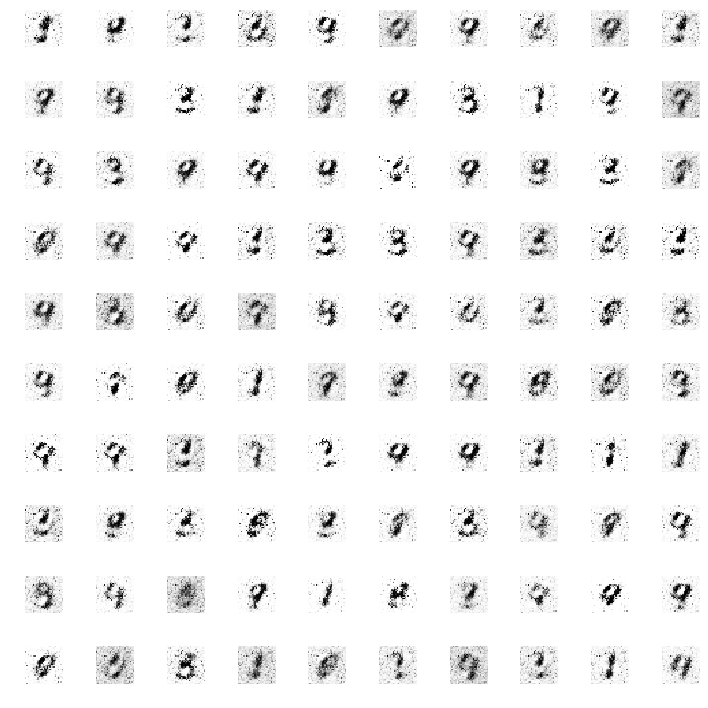

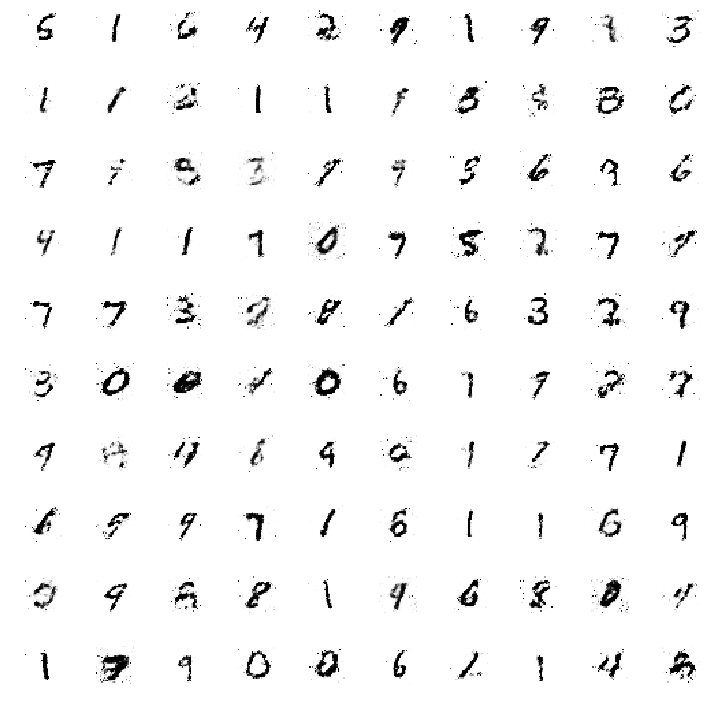

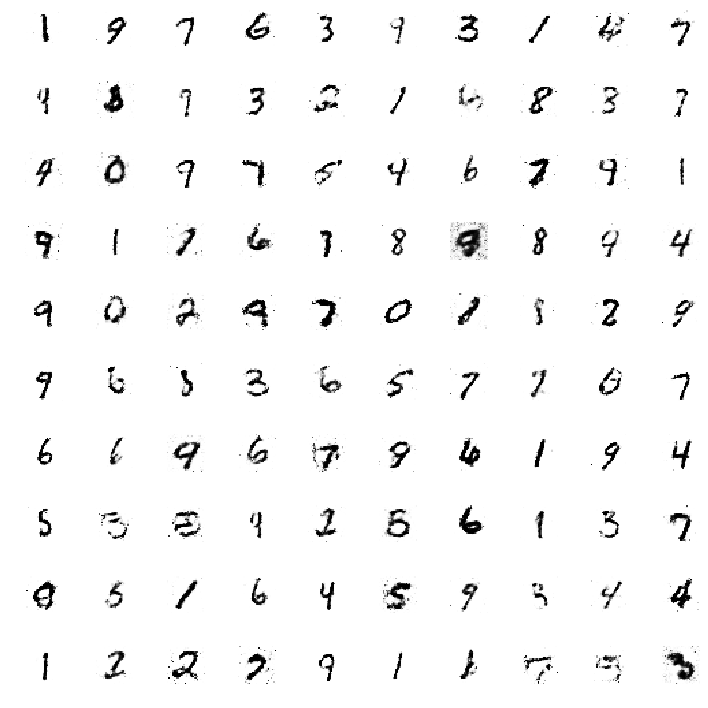

In [10]:
def train(epochs=1, batch_size=128):
    # Get the training and testing data
    x_train, y_train, x_test, y_test = load_minst_data()
    # Split the training data into batches of size 128
    batch_count = x_train.shape[0] / batch_size

    # Build our GAN netowrk
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)

    for e in xrange(1, epochs+1):
        print '-'*15, 'Epoch %d' % e, '-'*15
        for _ in tqdm(xrange(batch_count)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

            # Generate fake MNIST images
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])

            # Labels for generated and real data
            y_dis = np.zeros(2*batch_size)
            # One-sided label smoothing
            y_dis[:batch_size] = 0.9

            # Train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

if __name__ == '__main__':
    train(50, 128)